In [ ]:
#Upload data from device
from google.colab import files
uploaded = files.upload()

Saving balanced_dataset.csv to balanced_dataset.csv


In [ ]:
#reading the data
import pandas as pd
df = pd.read_csv('balanced_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17840 entries, 0 to 17839
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  17840 non-null  object
 1   label   17840 non-null  object
dtypes: object(2)
memory usage: 278.9+ KB


In [ ]:
df['label'].value_counts()

,count
label,
POSITIVE,8920
NEGATIVE,8920


In [ ]:
# text lowercase
df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df['label'] = df['label'].str.lower()


print(df.head())

                                              review     label
0  not bad stay pretty pleasant, alarm going 3 no...  positive
1  westin times square cheats customer starwood p...  negative
2  good news/ bad news seattle just night opted l...  positive
3  expectations booked riu bambu online having st...  negative
4  hospital stayed 2 weeks got sick stomach upset...  negative


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 29.3 MB/s eta 0:00:00


In [ ]:

#check if data has emojis
import emoji

def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in str(text))

df['has_emoji'] = df['review'].apply(contains_emoji)

df_with_emojis = df[df['has_emoji'] == True]
print(df_with_emojis.head())


                                                review     label  has_emoji
77   worst 👎👎👎👎👎. never go there they are theif. th...  negative       True
162  this is not a place ; this is an emotion. the ...  positive       True
261  খুবই সুন্দর ব্যবহার এবং student friendly মানে ...  negative       True
275  the breakfast and dinner options were fabulous...  positive       True
307  paris hiccaps, succumbing rave reviews similar...  positive       True


In [ ]:
# Convert emojis into words
!pip install emot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.2 MB/s eta 0:00:00


In [ ]:

# Importing libraries
import re
from emot.emo_unicode import UNICODE_EMOJI,EMOTICONS_EMO

# Function for converting emojis into words
def converting_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",", "").replace(":", "").split()))
    return text


df['review'] = df['review'].apply(converting_emojis)

print(df['review'].head(78))

0     not bad stay pretty pleasant, alarm going 3 no...
1     westin times square cheats customer starwood p...
2     good news/ bad news seattle just night opted l...
3     expectations booked riu bambu online having st...
4     hospital stayed 2 weeks got sick stomach upset...
                            ...                        
73    the room was very good. the washroom had decen...
74    i have stayed at both radisson properties in a...
75    horrendous service wife stayed normandie coupl...
76    great hotel stayed estherea 14-18 oct. chose h...
77    worst thumbs_downthumbs_downthumbs_downthumbs_...
Name: review, Length: 78, dtype: object


In [ ]:
#Removing Punctuation
import re
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s\']', '', str(x)))
df['review']

,review
0,not bad stay pretty pleasant alarm going 3 no ...
1,westin times square cheats customer starwood p...
2,good news bad news seattle just night opted lo...
3,expectations booked riu bambu online having st...
4,hospital stayed 2 weeks got sick stomach upset...
...,...
17835,great location pay stayed palace times visit s...
17836,simply awful hotel bad state repair time staye...
17837,this was my second time staying here with my d...
17838,n't worry old reviews just returned staying hi...


In [ ]:
#Remove extra spaces
df['review'] = df['review'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())


# Remove unnecessary numbers
df['review'] = df['review'].apply(lambda x: re.sub(r'\d+', '', x))
df['review']


,review
0,not bad stay pretty pleasant alarm going no p...
1,westin times square cheats customer starwood p...
2,good news bad news seattle just night opted lo...
3,expectations booked riu bambu online having st...
4,hospital stayed weeks got sick stomach upsets...
...,...
17835,great location pay stayed palace times visit s...
17836,simply awful hotel bad state repair time staye...
17837,this was my second time staying here with my d...
17838,n't worry old reviews just returned staying hi...


In [ ]:
!pip uninstall -y torch
!pip install torch==2.0.1
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 --index-url https://download.pytorch.org/whl/cu124

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
  Using cached torch-2.0.1-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached triton-2.0.0-1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.0 kB)
Using cached torch-2.0.1-cp311-cp311-manylinux1_x86_64.whl (619.9 MB)
Using cached triton-2.0.0-1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (63.3 MB)
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 2.0.1 which is incompatible.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 2.0.1 which is incompatible.
Found e

In [ ]:

# spacy to To exclude negative words from stop words
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 29.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# to extract negative words using spacy
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_negation_words_spacy(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc if token.dep_ == "neg"]

In [ ]:

negation_words = ['no', 'not', 'nor', "don't","doesn't","never", "didn't", "can't", "won't", "couldn't", "shouldn't", "wouldn't", "n't"]

# combine all negative words
def get_all_negation_words(text):

    neg_spacy = extract_negation_words_spacy(text)

    tokens = text.lower().split()
    manual_found = [word for word in negation_words if word in tokens]

    return list(set(neg_spacy + manual_found))

df['negation_words'] = df['review'].apply(get_all_negation_words)


In [ ]:
#Removing Stop Words
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
all_negation_words = list(set(df['negation_words'].explode().dropna()))
custom_stop = [word for word in stop if word not in all_negation_words]


df['review'] = df['review'].apply(lambda x: " ".join(word for word in x.split() if word not in custom_stop))
df['review']

,review
0,not bad stay pretty pleasant alarm going no pr...
1,westin times square cheats customer starwood p...
2,good news bad news seattle night opted locatio...
3,expectations booked riu bambu online stayed ri...
4,hospital stayed weeks got sick stomach upsets ...
...,...
17835,great location pay stayed palace times visit s...
17836,simply awful hotel bad state repair time staye...
17837,second time staying daughter husbands first re...
17838,n't worry old reviews returned staying hilton ...


In [ ]:
#import necessary libraries for tokenization
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:


#Tokenizing Text
from nltk.tokenize import word_tokenize

df['review_tokens'] = df['review'].apply(lambda x: word_tokenize(str(x)))
print(df[['review', 'review_tokens']].head())

                                              review  \
0  not bad stay pretty pleasant alarm going no pr...   
1  westin times square cheats customer starwood p...   
2  good news bad news seattle night opted locatio...   
3  expectations booked riu bambu online stayed ri...   
4  hospital stayed weeks got sick stomach upsets ...   

                                       review_tokens  
0  [not, bad, stay, pretty, pleasant, alarm, goin...  
1  [westin, times, square, cheats, customer, star...  
2  [good, news, bad, news, seattle, night, opted,...  
3  [expectations, booked, riu, bambu, online, sta...  
4  [hospital, stayed, weeks, got, sick, stomach, ...  


In [ ]:
#install necessary libariries
nltk.download('wordnet')
nltk.download('omw-1.4') #for post-of_speech method
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:

#POS for making lemmatization more effecient
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
#Lemmatize the data using  WordNetLemmatizer

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def lemmatize_tokens(tokens):
    # POS tagging
    pos_tags = nltk.pos_tag(tokens)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []

    for word, tag in pos_tags:

        wordnet_pos = get_wordnet_pos(tag)

        lemmatized_word = lemmatizer.lemmatize(word, wordnet_pos)
        lemmatized_words.append(lemmatized_word)

    return lemmatized_words


df['review_lemmatized'] = df['review_tokens'].apply(lemmatize_tokens)
print(df[['review_tokens', 'review_lemmatized']].head())

                                       review_tokens  \
0  [not, bad, stay, pretty, pleasant, alarm, goin...   
1  [westin, times, square, cheats, customer, star...   
2  [good, news, bad, news, seattle, night, opted,...   
3  [expectations, booked, riu, bambu, online, sta...   
4  [hospital, stayed, weeks, got, sick, stomach, ...   

                                   review_lemmatized  
0  [not, bad, stay, pretty, pleasant, alarm, go, ...  
1  [westin, time, square, cheat, customer, starwo...  
2  [good, news, bad, news, seattle, night, opt, l...  
3  [expectation, book, riu, bambu, online, stay, ...  
4  [hospital, stay, week, get, sick, stomach, ups...  


In [ ]:
#Compute the frequency of all words in the reviews
from nltk.probability import FreqDist

all_text = ' '.join(df['review_lemmatized'].apply(lambda x: ' '.join(x)))
freq_dist = FreqDist(all_text.split())
freq_dict = dict(freq_dist)
freq_dist

FreqDist({'room': 28999, 'hotel': 28137, 'not': 21072, 'stay': 14931, 'good': 11300, "n't": 11078, 'staff': 9352, 'read': 8972, 'great': 8694, 'no': 7836, ...})

In [ ]:
!pip install wordcloud

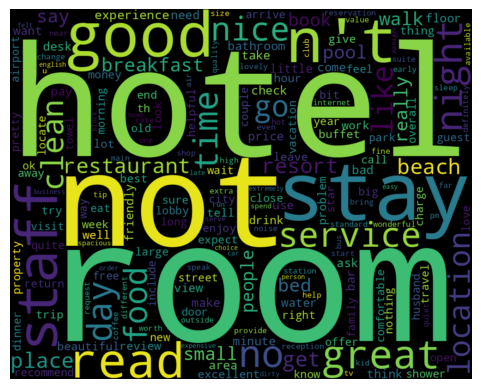

In [ ]:
# Build a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud_review = WordCloud(width=1000, height=800, background_color='black').generate_from_frequencies(freq_dict)
plt.imshow(cloud_review, interpolation='bilinear')

plt.axis('off')
plt.show()

In [ ]:
#reviews and label contains data
df_filtered = df[df['review_lemmatized'].apply(lambda x: len(x) > 0)].copy()
df_filtered = df_filtered[df_filtered['label'].notna()].copy()

In [ ]:
df_filtered.to_csv("balanced_dataset21.csv", index=False)

In [ ]:
from google.colab import files
files.download("balanced_dataset21.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving balanced_dataset21 (2).csv to balanced_dataset21 (2).csv


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
df = pd.read_csv('balanced_dataset21.csv')  # Load the DataFrame


In [ ]:
texts = df['review_lemmatized']

In [ ]:
texts = df['review_lemmatized'].apply(lambda x: ' '.join(x))

In [ ]:
# Removing Stop Words
from nltk.corpus import stopwords

In [ ]:
stop = stopwords.words('english')

In [ ]:
# Exclude important words or negation words from stop words
my_stop_words = stop + ["is", "are", "am"]  #add or remove words to customize
all_negation_words = list(set(df['negation_words'].explode().dropna()))
custom_stop = [word for word in my_stop_words if word not in all_negation_words]


In [ ]:
df['review'] = df['review'].apply(lambda x: " ".join(word for word in x.split() if word not in custom_stop))
df['review']


,review
0,bad stay pretty pleasant alarm going problems ...
1,westin times square cheats customer starwood p...
2,good news bad news seattle night opted locatio...
3,expectations booked riu bambu online stayed ri...
4,hospital stayed weeks got sick stomach upsets ...
...,...
17835,great location pay stayed palace times visit s...
17836,simply awful hotel bad state repair time staye...
17837,second time staying daughter husbands first re...
17838,n't worry old reviews returned staying hilton ...


In [ ]:
# ... (rest of your code) ...

In [ ]:
# ... (previous code) ...


In [ ]:
# Check for empty or very short lemmatized reviews
print(df[df['review_lemmatized'].apply(lambda x: len(x) < 2)])

Empty DataFrame
Columns: [review, label, has_emoji, negation_words, review_tokens, review_lemmatized]
Index: []


In [ ]:
vectorizer = CountVectorizer(stop_words='english', min_df=2)
X = vectorizer.fit_transform

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
texts = ["hello world", "machine learning is fun"]

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)


In [ ]:
print(X.toarray())

[[0 1 0 0 0 1]
 [1 0 1 1 1 0]]


In [ ]:
vectorizer = CountVectorizer()
texts = df['review_lemmatized'].apply(lambda x: ' '.join(x))

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
texts = df['review_lemmatized'].apply(lambda x: ' '.join(x))


In [ ]:
# Join the lemmatized tokens back into a single string for each review
texts = df['review_lemmatized'].apply(lambda x: ' '.join(x))

# Now you can use fit_transform
texts = vectorizer.fit_transform

In [ ]:
print(vectorizer.vocabulary)

None


In [ ]:
print(type(X))

<class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
from sklearn.model_selection import train_test_split # Import the necessary function
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
texts = ["good movie", "bad movie", "awesome", "boring", "great stuff"]
labels = [1, 0, 1, 0, 1]

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)


In [ ]:
# Now you can use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [ ]:
# Assuming 'df' is your DataFrame containing 'review_lemmatized' and 'label' columns


In [ ]:
# Prepare the text data
texts = df['review_lemmatized'].apply(lambda x: ' '.join(x))
labels = df['label']


In [ ]:
 # Convert the sparse matrix to a dense array
 X = X.toarray()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
texts = df['review_lemmatized'].apply(lambda x: ' '.join(x))
labels = df['label']


In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
import numpy as np
y_train = np.array(y_train).astype("float32")  # أو "int32" حسب نوع المهمة


In [ ]:
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')


In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6976
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5000 - loss: 0.6758
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5000 - loss: 0.6553
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7500 - loss: 0.6359
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.7500 - loss: 0.6172


In [ ]:
print(X_train.shape)
print(len(y_train))


(4, 7)
4


In [ ]:
y_train = df['label'].map({'positive': 1, 'negative': 0}).values


In [ ]:
print(X_test.shape[0], len(y_test))

1 1


In [ ]:
y_test = np.array(y_test).astype('float32')


In [ ]:
# ... (rest of your code) ...

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Deep Learning Model Accuracy: {accuracy:.4f}")

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/SparseToDense defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-109-d79ad3336136>", line 1, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 484, in evaluate

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 89, in test_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 174, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 320, in _standardize_inputs

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 246, in _convert_inputs_to_tensors

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/core.py", line 952, in convert_to_tensor

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/core.py", line 127, in convert_to_tensor

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/sparse.py", line 20, in sparse_to_dense

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.


	 [[{{node sequential_1/SparseToDense}}]] [Op:__inference_multi_step_on_iterator_2318]